**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Phase 1: Business Understanding**

In this case, we want to predict avocado prices to assist stakeholders in making pricing and supply chain decisions

**Phase 2: Data Understanding**

In this phase, we collect and explore the data.

In [ ]:
import pandas as pd

# Load the Avocado Price Prediction Dataset
data = pd.read_csv("/content/gdrive/MyDrive/Assignment 3 Datasets/avocado.csv")

In [ ]:
# Display basic dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [ ]:
# Check the first few rows of the dataset
print(data.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [ ]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


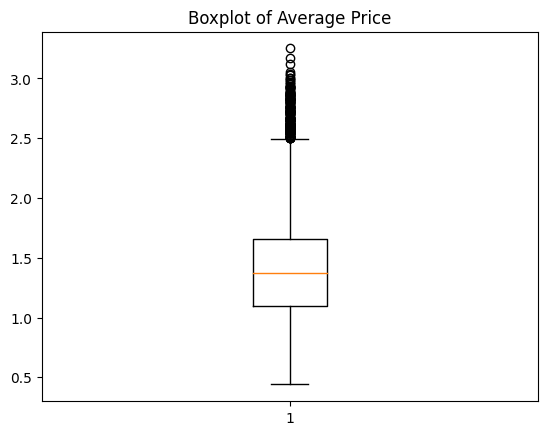

In [ ]:
# Check for outliers
import matplotlib.pyplot as plt
plt.boxplot(data['AveragePrice'])
plt.title('Boxplot of Average Price')
plt.show()

**Phase 3: Data Preparation**

Prepare the data for modeling

In [ ]:
# Handle missing values (if any)
data.dropna(inplace=True)

In [ ]:
# Encode categorical variables (if any)
data = pd.get_dummies(data, columns=['type', 'region'], drop_first=True)

In [ ]:
# Feature engineering (e.g., lagged prices, seasonal indicators)
data['lagged_price'] = data['AveragePrice'].shift(1)
data['month'] = pd.to_datetime(data['Date']).dt.month

In [ ]:
# Split the data into training and testing sets.
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['AveragePrice', 'Date'], axis=1)
y = data['AveragePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Phase 4: Modeling**

In this phase, we build predictive models

In [ ]:
# Model selection
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
# Impute Missing Values
from sklearn.impute import SimpleImputer

In [ ]:
# Create an imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Model Training
model.fit(X_train_imputed, y_train)

LinearRegression()

In [ ]:
# Evaluate the model's performance using appropriate metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = model.predict(X_test_imputed)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

In [ ]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.03
R-squared: 0.84


**Phase 5: Evaluation**

Assess the model's performance and make necessary adjustments

In [ ]:
# Model Fine-Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define hyperparameters to tune
param_grid = {'fit_intercept': [True, False]}

In [ ]:
# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [ ]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'fit_intercept': True}


In [ ]:
# Model Validation - using k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(best_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

In [ ]:
print(f"Cross-Validation Mean MSE: {mean_cv_score:.2f}")
print(f"Cross-Validation Standard Deviation: {std_cv_score:.2f}")

Cross-Validation Mean MSE: 0.03
Cross-Validation Standard Deviation: 0.00


**Phase 6: Deployment**

Deploy the model in a production environment for making predictions. Integrate the model into an application or system for stakeholders to use.